# Adult Income Exercise

For this exercise we will use a dataset that contains some features about people and we need to predict <b>if each person is payed more than 50.000 $ annualy or not</b>.

- You need to:
    - Explore the dataset
    - Give some basic information about the data
    - Preprocess the data (missing values, imputation...)
    - Test various Machine Learning algorithms
    - Evaluate the performance of these algorithms over the test data in terms of Accuracy, Precision, Recall, F1, plot the confusion matrix...
    - Chose one of these algorithms to perfom the task prediction and explain why (in comments or in a markdown cell)



# 0. Imports & and Data exploration

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from scipy.stats import randint, uniform


# Read in the data
df = pd.read_csv('data/adult.csv')

## 0.1 Exploring the dataframe

In [2]:
# fnlwgt is a weight variable that represents the demographic characteristics of each person surveyed.
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
df.shape

(48842, 15)

In [5]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [6]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

# 1. Data visualization
The aim here is to understand the data we're gonna work with

## 1.1 Plot distribution of numerical feature

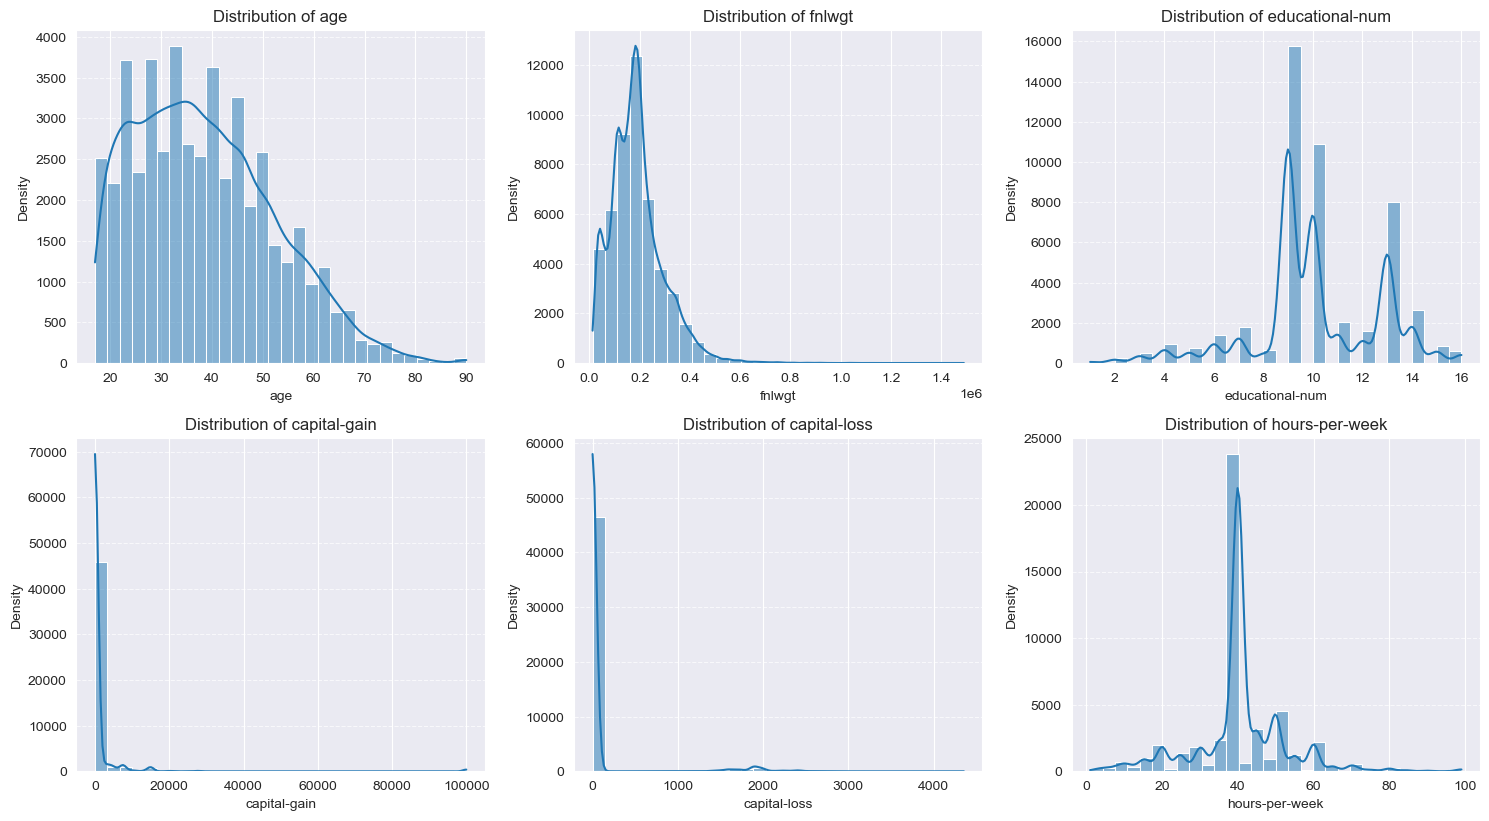

In [17]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Plot the probabilistic distribution of the numerical features
plt.figure(figsize=(15, 12))
for idx, feature in enumerate(numerical_features):
    plt.subplot(3, 3, idx + 1)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## 1.2 Plot distribution of categorical features

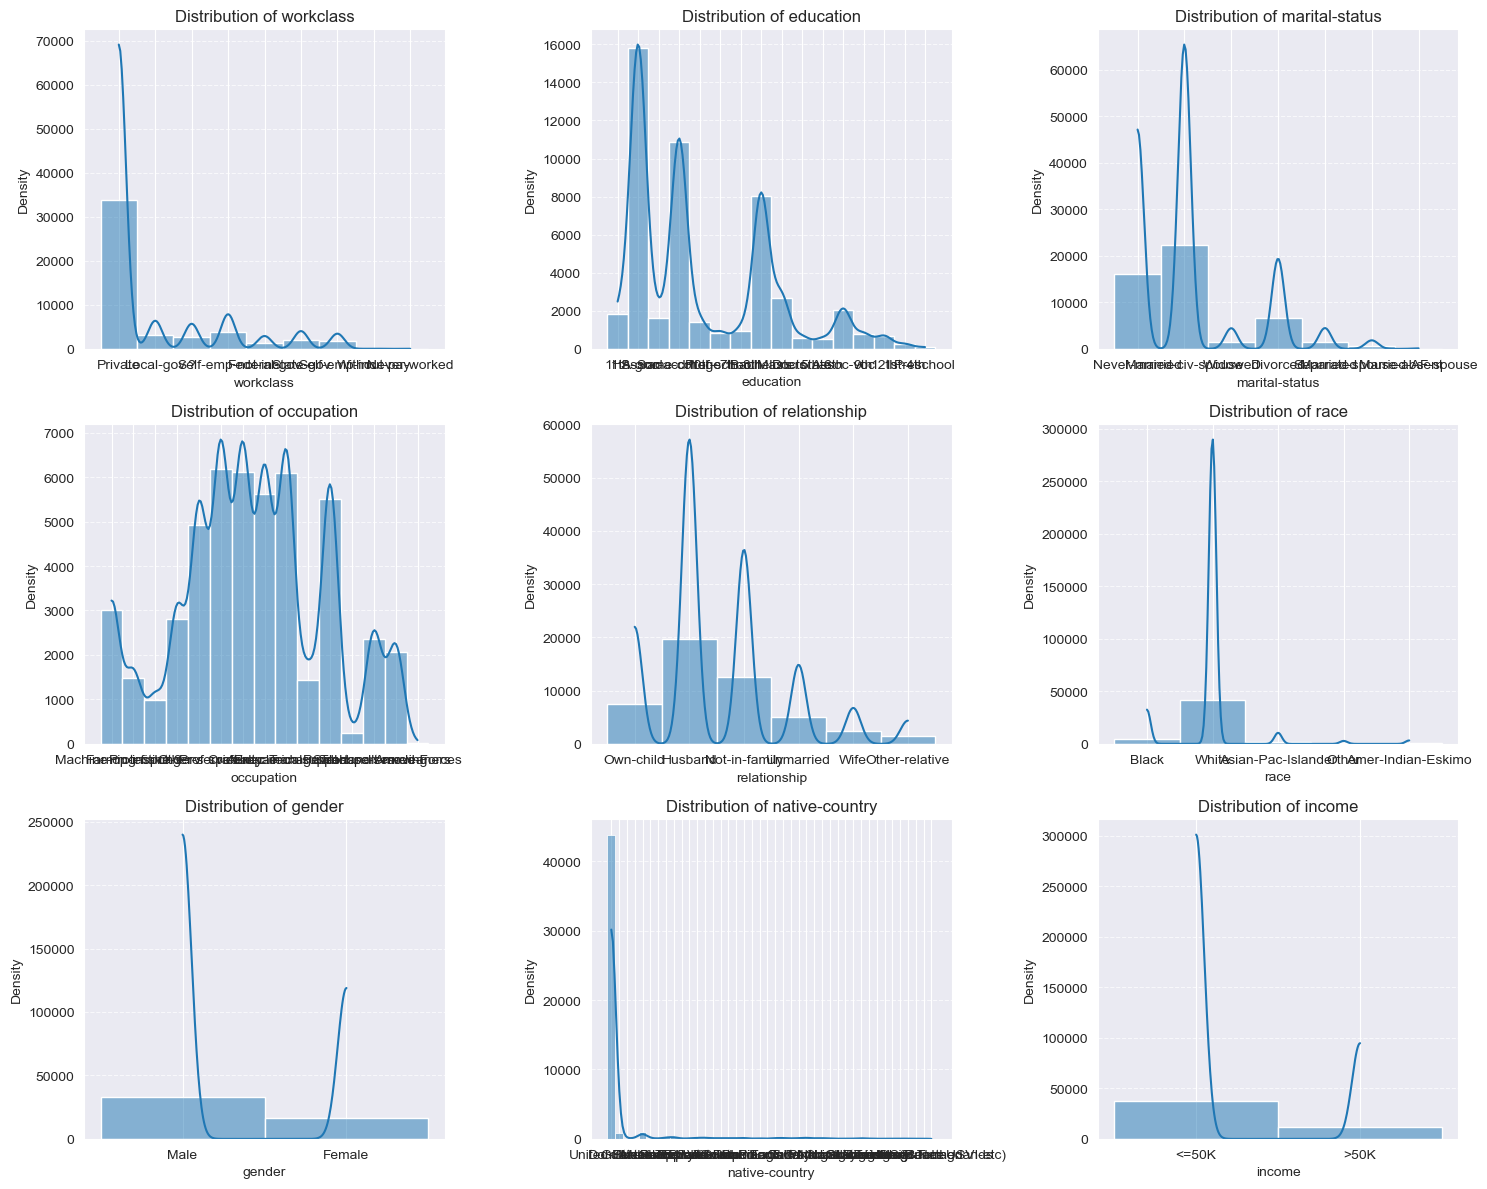

In [8]:
# Selecting categorical features
categorical_features = df.select_dtypes(include=['object'])
# Plot the probabilistic distribution of the numerical features
plt.figure(figsize=(15, 12))
for idx, feature in enumerate(categorical_features):
    plt.subplot(3, 3, idx + 1)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## 1.3 Plot relationship between features and target variable


# 2. Data preprocessing / Feature engineering
The aim of this part is to treat the dataset or process it to facilitate the learning process and obtain optimized results

## 2.1 Splitting the Target and data

In [9]:
X, y = df.drop(columns='income'), df['income']

## 2.2 Missing values

In [10]:
y.isna().sum()

0

In [11]:
X.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
dtype: int64

## 2.3  Encoding categorical variables 

In [12]:
X.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States


In [13]:
# Selecting categorical features columns
categorical_features_columns = X.select_dtypes(include=['object']).columns
numerical_features_columns = X.select_dtypes(exclude=['int64', 'float64']).columns

# Loop through each categorical feature column and apply LabelEncoder
for col in categorical_features_columns:
    label_encoder = LabelEncoder()  # Create a new instance of LabelEncoder for each column
    X[col] = label_encoder.fit_transform(X[col])  # Fit and transform, and assign back to the DataFrame

print("Categorical features encoded successfully!")

Categorical features encoded successfully!


In [14]:
X.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,39
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,39
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,39
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,39
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,39


We can also encode the target variable since its a string right now we can transofrom it to 0s and 1s

In [15]:
y = y.map({'>50K': 1, '<=50K': 0})
y.head()

0    0
1    0
2    1
3    1
4    0
Name: income, dtype: int64

## 2.4 Feature scaling
We're going to scale only the variables that we do not have encoded because this does not make much sense, we're going to use the $numerical_features$ variable which we instantiated right before encoding columns.

In [18]:
scaler = StandardScaler()

scaled_features = scaler.fit_transform(X[numerical_features])
scaled_features_df = pd.DataFrame(scaled_features, columns=numerical_features, index=X.index)

X[numerical_features] = scaled_features_df

print("Successfully scaled non-encoded features!")

Successfully scaled non-encoded features!


## 2.5 Train Test split

In [19]:
X_train = X.sample(frac=0.8, random_state=42)
X_test = X.drop(X_train.index)

y_train = y.sample(frac=0.8, random_state=42)
y_test = y.drop(y_train.index)

# 3. Modeling and evaluation
Here we're going to fit and predicts values with various models coming from various python libraries. Using metrics we're going to be able to compare and choose a model that fit our needs

## 3.1 Evaluation metrics

In [20]:
# Define the metrics to be used for classification models
metrics = ['accuracy', 'precision', 'recall', 'f1_score']

# Define the models 
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']

# Initialize a dictionary of dictionaries for evaluation metrics
evaluation_metrics = {model: {metric: None for metric in metrics} for model in models}

## 3.2 Logistic regression
Fitting a logistic regression model on the training set. Evaluating the model on the testing set.


In [23]:
logistic_regression = LogisticRegression(random_state=42, max_iter=1000)
logistic_regression.fit(X_train, y_train)

# Predict on the test set
y_pred_logistic = logistic_regression.predict(X_test)

# Calculate evaluation metrics
evaluation_metrics['Logistic Regression']['accuracy'] = accuracy_score(y_test, y_pred_logistic)
evaluation_metrics['Logistic Regression']['precision'] = precision_score(y_test, y_pred_logistic)
evaluation_metrics['Logistic Regression']['recall'] = recall_score(y_test, y_pred_logistic)
evaluation_metrics['Logistic Regression']['f1_score'] = f1_score(y_test, y_pred_logistic)

evaluation_metrics['Logistic Regression']

{'accuracy': 0.8236076986076986,
 'precision': 0.72911051212938,
 'recall': 0.45027049521431545,
 'f1_score': 0.5567275533830718}

## 3.3 Decision Tree
Fitting a decision tree model on the training set. Using cross-validation in order to tune the hyperparameters of the decision tree model. Evaluating the model on the testing set.

In [25]:
decision_tree = DecisionTreeClassifier()

decision_tree_hyperparameters = {
    'criterion': ['gini', 'entropy'],                
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': [None, 'sqrt', 'log2'],
    'splitter': ['best', 'random'],
}

# Perform Grid Search to find the best hyperparameters for Decision Tree
grid_search_dt = GridSearchCV(DecisionTreeClassifier(), param_grid=decision_tree_hyperparameters, cv=5, scoring='accuracy', n_jobs=5)
grid_search_dt.fit(X_train, y_train)

# Get the best hyperparameters
best_params_dt = grid_search_dt.best_params_

print("Best parameters set found on training set:", best_params_dt)

decision_tree_best_model = DecisionTreeClassifier(**best_params_dt)

# Fit the model on the training set
decision_tree_best_model.fit(X_train, y_train)
# Predict on the test set using the best Decision Tree model
y_pred_dt = decision_tree_best_model.predict(X_test)

# Calculate evaluation metrics for the best Decision Tree model
evaluation_metrics['Decision Tree']['accuracy'] = accuracy_score(y_test, y_pred_dt)
evaluation_metrics['Decision Tree']['precision'] = precision_score(y_test, y_pred_dt)
evaluation_metrics['Decision Tree']['recall'] = recall_score(y_test, y_pred_dt)
evaluation_metrics['Decision Tree']['f1_score'] = f1_score(y_test, y_pred_dt)

evaluation_metrics['Decision Tree']



Best parameters set found on training set: {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'best'}


{'accuracy': 0.8562653562653563,
 'precision': 0.7624802942722018,
 'recall': 0.6038285476487724,
 'f1_score': 0.6739433348815607}

We can plot the decision tree using the plot_tree function from sklearn to visualise our model

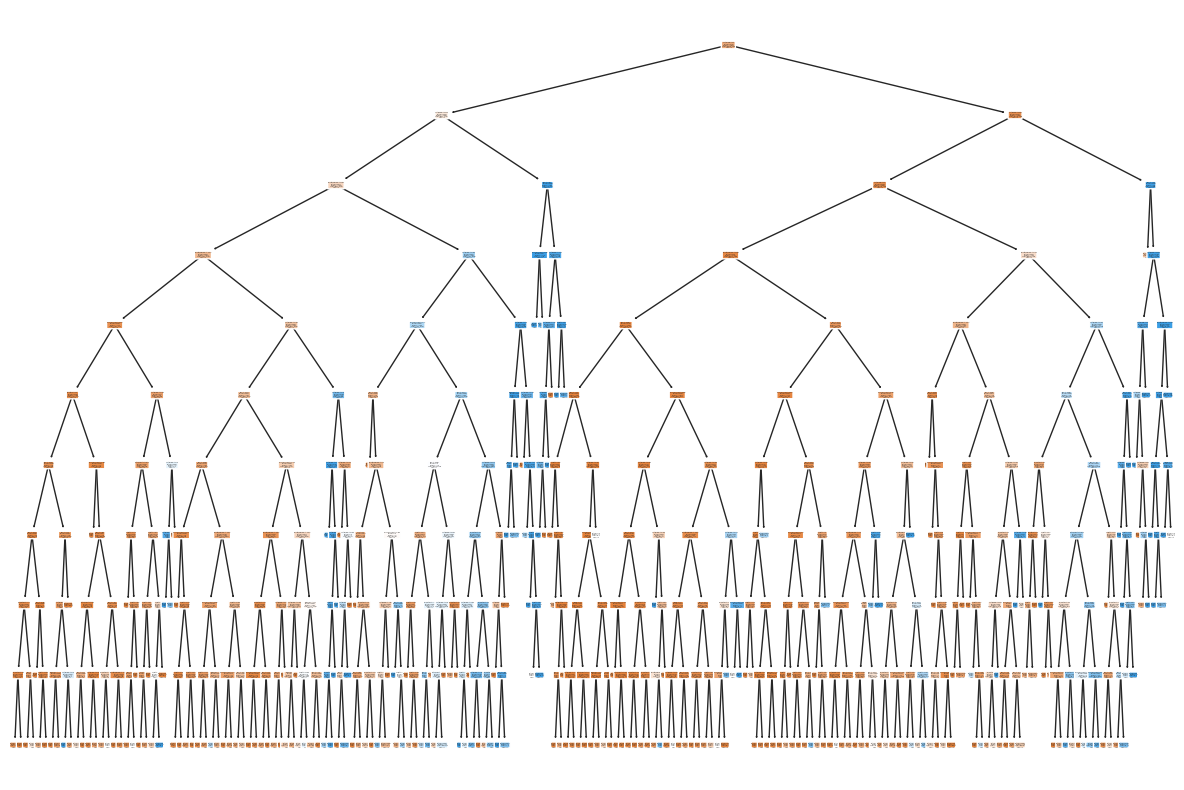

<Figure size 640x480 with 0 Axes>

In [26]:
unique_class_names = y_train.astype(str).unique()

plt.figure(figsize=(15, 10))
plot_tree(decision_tree_best_model,
               feature_names=X_train.columns,
               class_names=unique_class_names,
               filled=True,
               rounded=True)
plt.show()
plt.savefig('figures/decision_tree.png')

## 3.4 Random Forest
Fitting a random forest model on the training set. Using cross-validation in order to tune the hyperparameters of the model. Evaluating the model on the testing set.


In [31]:
random_forest = RandomForestClassifier(random_state=42)

random_forest_hyperparameters = {
    'n_estimators': randint(50, 300),
    'max_depth': [3, 5, 10, None],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
}

# Set up the Randomized Search with cross-validation
random_search_rf = RandomizedSearchCV(
    estimator=random_forest,
    param_distributions=random_forest_hyperparameters,
    n_iter=50,
    cv=5,
    scoring='f1_weighted',
    n_jobs=5,
    random_state=42
)

# Fit the Randomized Search model
random_search_rf.fit(X_train, y_train)

# Retrieve the best hyperparameters
best_params_rf = random_search_rf.best_params_

print("Best Hyperparameters:", best_params_rf)

# Train the best Random Forest model with the optimal hyperparameters
random_forest_best_model = RandomForestClassifier(**best_params_rf, random_state=42)
random_forest_best_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_rf = random_forest_best_model.predict(X_test)

# Calculate evaluation metrics for the best Random Forest model
evaluation_metrics['Random Forest']['accuracy'] = accuracy_score(y_test, y_pred_rf)
evaluation_metrics['Random Forest']['precision'] = precision_score(y_test, y_pred_rf)
evaluation_metrics['Random Forest']['recall'] = recall_score(y_test, y_pred_rf)
evaluation_metrics['Random Forest']['f1_score'] = f1_score(y_test, y_pred_rf)

# Display the evaluation metrics
print(evaluation_metrics['Random Forest'])


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 179}
{'accuracy': 0.864045864045864, 'precision': 0.7863612147043154, 'recall': 0.6142322097378277, 'f1_score': 0.6897196261682244}


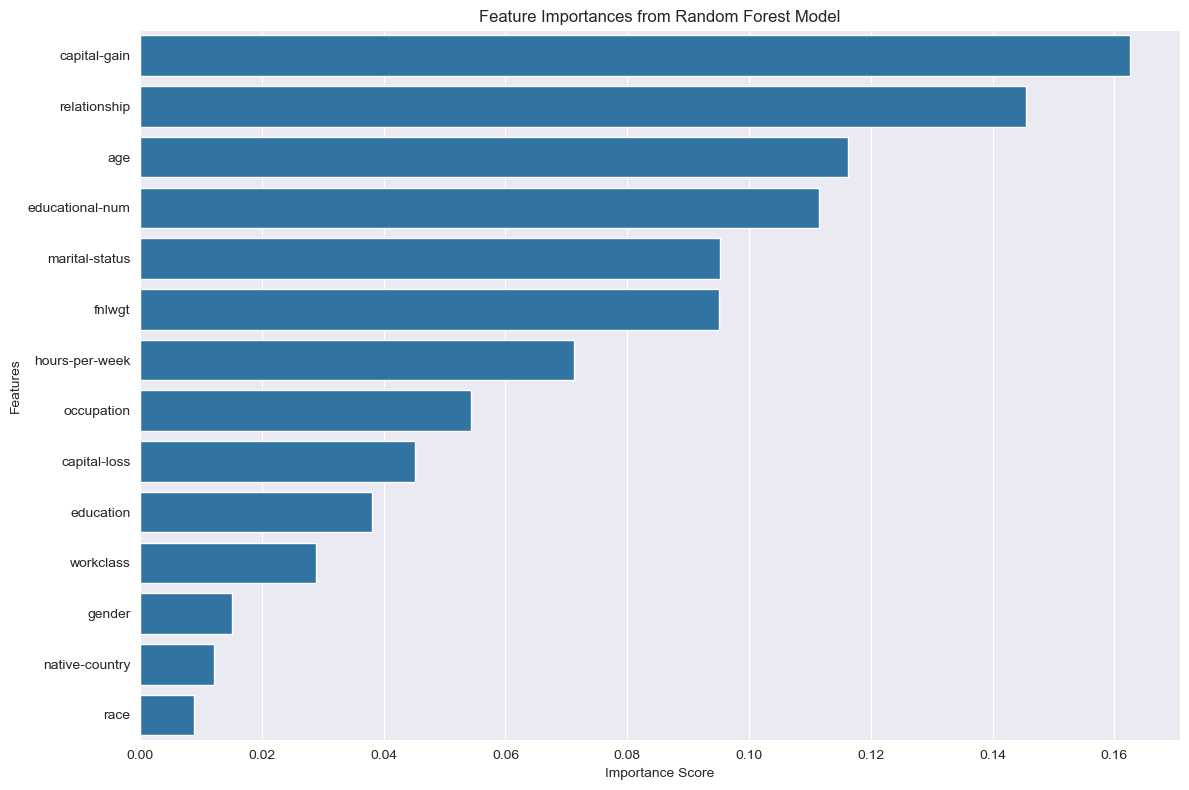

In [33]:
# Extract feature importances from the trained model
feature_importances = random_forest_best_model.feature_importances_

# Get the feature names
feature_names = X_train.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances from Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


## 3.5 Gradient boosting
Fitting a gradient boosting model on the training set. Using cross-validation in order to tune the hyperparameters of the gradient boosting model. 

In [45]:
# Initialize the Gradient Boosting Classifier
gradient_boosting = GradientBoostingClassifier(random_state=42)

# Define the hyperparameter distributions for RandomizedSearchCV
gradient_boosting_hyper_params = {
    'loss': ['log_loss', 'exponential'],
    'learning_rate': uniform(0.01, 0.19),
    'n_estimators': randint(50, 201),
    'subsample': uniform(0.5, 0.5),
    'max_depth': randint(1, 4),
    'min_samples_split': randint(2, 33),
    'min_samples_leaf': randint(2, 257),
    'min_weight_fraction_leaf': uniform(0.0, 0.2),
    'max_features': randint(2, X_train.shape[1] + 1),
}

# Set up the Randomized Search with cross-validation
random_search_gb = RandomizedSearchCV(
    estimator=gradient_boosting,
    param_distributions=gradient_boosting_hyper_params,
    scoring='f1_macro',
    cv=5,
    n_jobs=5,
    n_iter=50,
    random_state=42
)

# Fit the Randomized Search model
random_search_gb.fit(X_train, y_train)

# Retrieve the best hyperparameters
best_params_gb = random_search_gb.best_params_
print("Best Hyperparameters:", best_params_gb, 3, '\n')

# Train the best Gradient Boosting model
gradient_boosting_best_model = GradientBoostingClassifier(**best_params_gb, random_state=42)
gradient_boosting_best_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_gb = gradient_boosting_best_model.predict(X_test)

# Calculate evaluation metrics for the best Gradient Boosting model
evaluation_metrics['Gradient Boosting']['accuracy'] = round(accuracy_score(y_test, y_pred_gb), 3)
evaluation_metrics['Gradient Boosting']['precision'] = round(precision_score(y_test, y_pred_gb), 3)
evaluation_metrics['Gradient Boosting']['recall'] = round(recall_score(y_test, y_pred_gb), 3)
evaluation_metrics['Gradient Boosting']['f1_score'] = round(f1_score(y_test, y_pred_gb), 3)

# Display the evaluation metrics
print(evaluation_metrics['Gradient Boosting'])


Best Hyperparameters: {'learning_rate': 0.1479573534073057, 'loss': 'log_loss', 'max_depth': 2, 'max_features': 13, 'min_samples_leaf': 107, 'min_samples_split': 31, 'min_weight_fraction_leaf': 0.008213503353575157, 'n_estimators': 169, 'subsample': 0.6354161256310371} 3 

{'accuracy': 0.861, 'precision': 0.784, 'recall': 0.598, 'f1_score': 0.678}


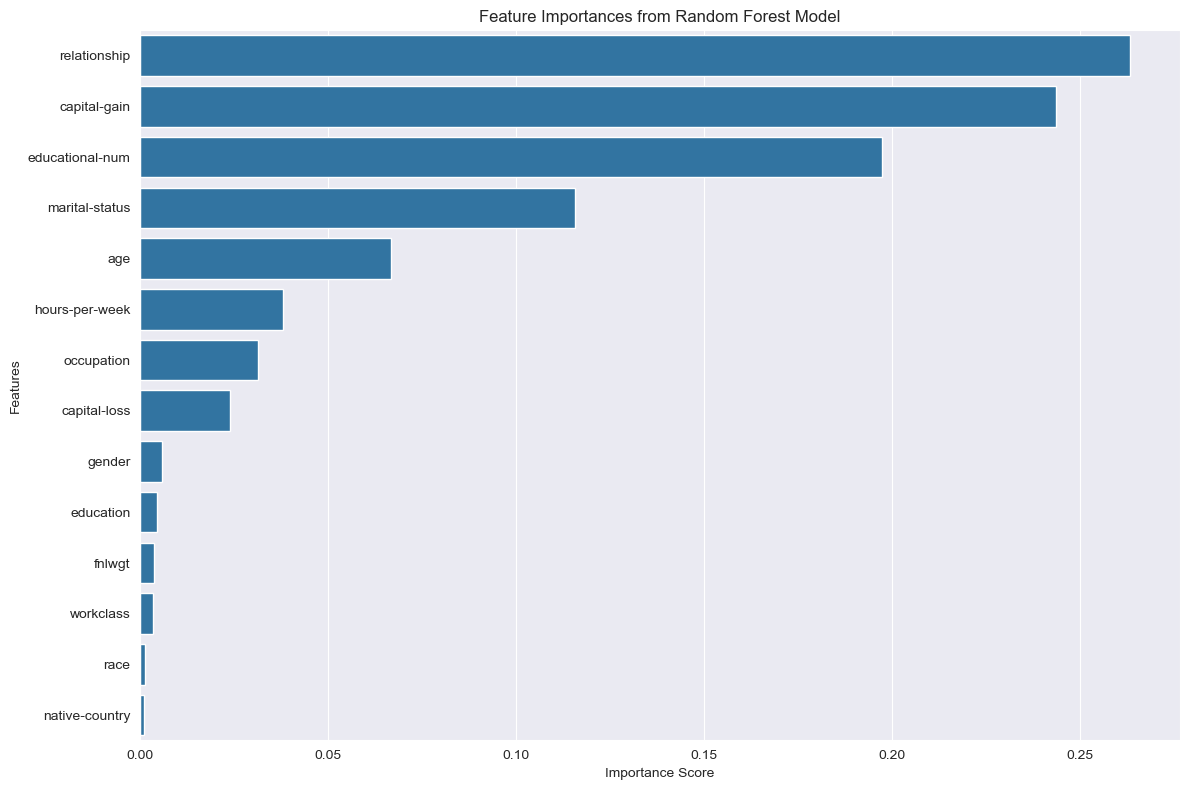

In [42]:
# Extract feature importances from the trained model
feature_importances = gradient_boosting_best_model.feature_importances_

# Get the feature names
feature_names = X_train.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances from Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


# 4. Model comparisons
Here by comparing models we're going to be able to choose the best performing model, by comparing metrics and results.

### 4.1 Converting the metrics dictionary into a DataFrame

In [46]:
import pandas as pd

# Convert the evaluation_metrics dictionary into a DataFrame
metrics_df = pd.DataFrame(evaluation_metrics).T

metrics_df

,accuracy,precision,recall,f1_score
Logistic Regression,0.823608,0.729111,0.450270,0.556728
Decision Tree,0.856265,0.762480,0.603829,0.673943
Random Forest,0.864046,0.786361,0.614232,0.689720
Gradient Boosting,0.861000,0.784000,0.598000,0.678000


### 4.2 Visualize the Evaluation Metrics Using Bar Plots

<Figure size 1200x600 with 0 Axes>

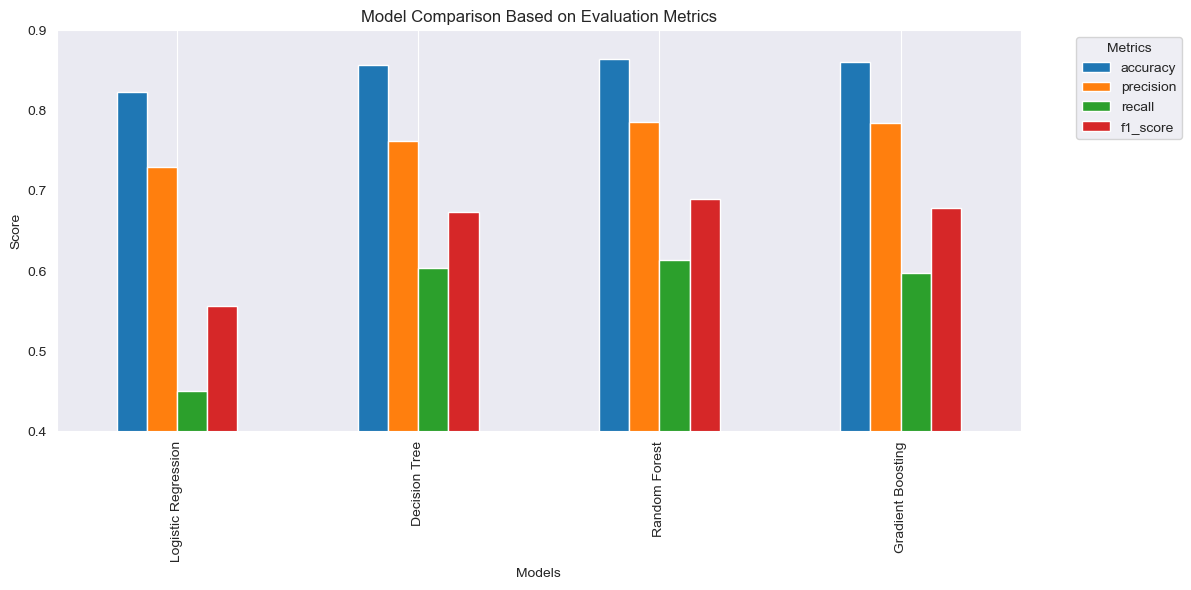

In [51]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Plot bar charts for each metric
metrics_df.plot(kind='bar', figsize=(12, 6))

# Set plot titles and labels
plt.title('Model Comparison Based on Evaluation Metrics')
plt.xlabel('Models')
plt.ylabel('Score')
plt.ylim(0.4, 0.9)
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

### 4.3 Identify the Best Model for Each Metric

In [48]:
# Find the model with the highest score for each metric
best_models_per_metric = metrics_df.idxmax()

print("Best models for each metric:")
print(best_models_per_metric)

Best models for each metric:
accuracy     Random Forest
precision    Random Forest
recall       Random Forest
f1_score     Random Forest
dtype: object


### 4.4 Confusion matrix's

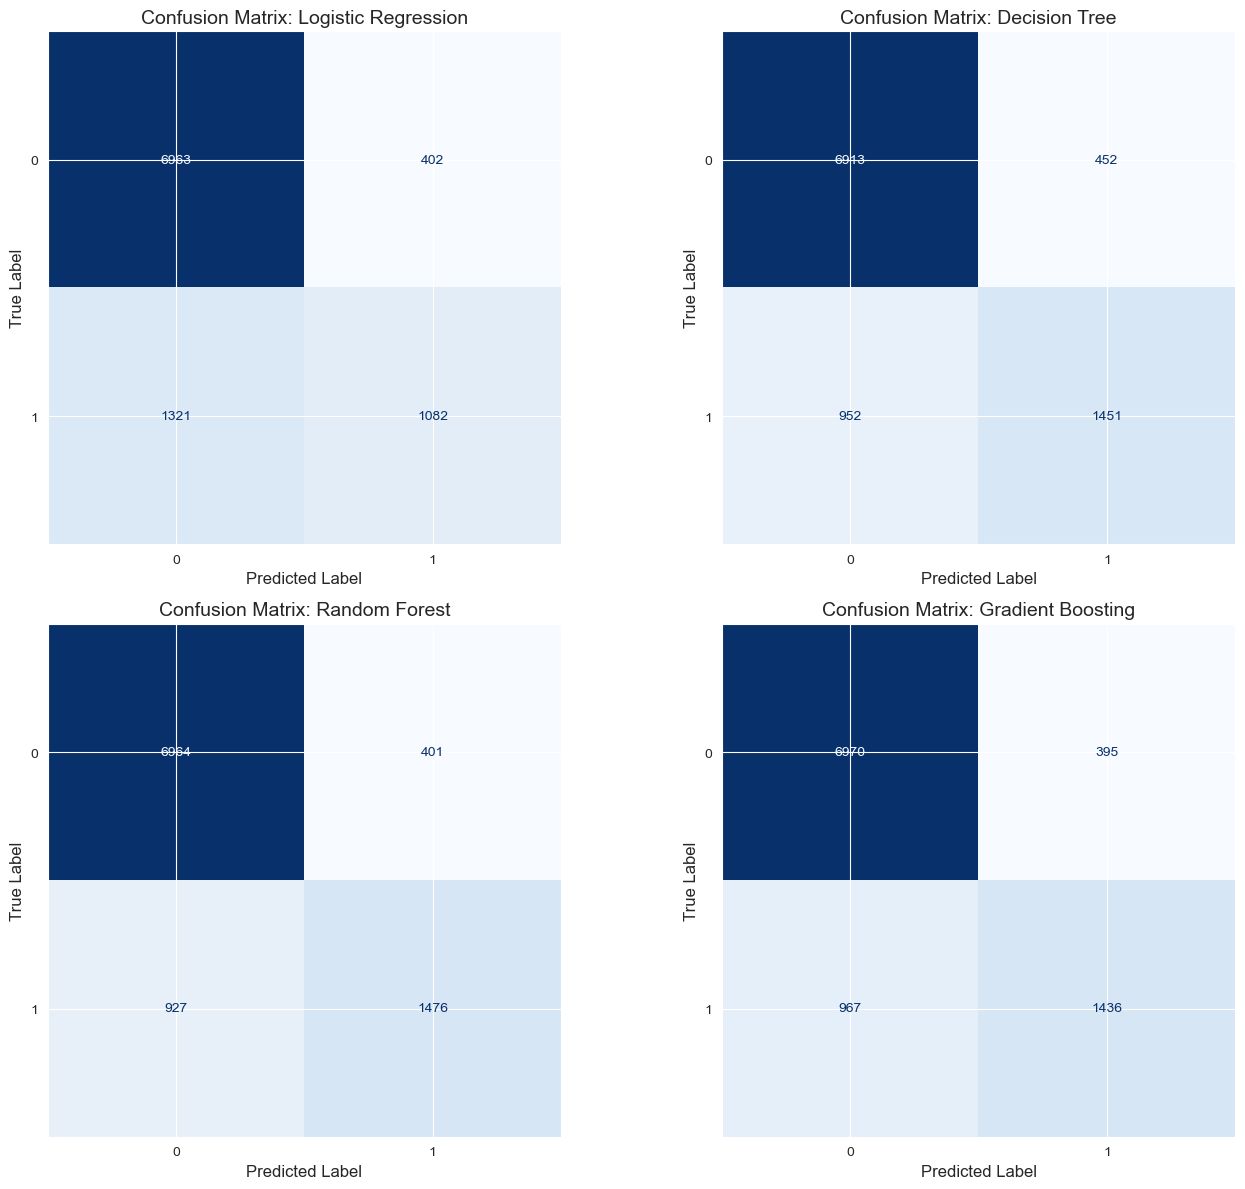

In [56]:
# Create a list of predictions and model names
predictions = [y_pred_logistic, y_pred_dt, y_pred_rf, y_pred_gb]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']

# Set up the matplotlib figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))  # 2 rows, 2 columns

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop over the models and axes
for ax, y_pred, model_name in zip(axes, predictions, model_names):
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax, cmap='Blues', values_format='d', colorbar=False)
    ax.set_title(f'Confusion Matrix: {model_name}', fontsize=14)
    ax.set_xlabel('Predicted Label', fontsize=12)
    ax.set_ylabel('True Label', fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=10)

# Adjust layout
plt.tight_layout()
plt.show()


### 4. Determine the Overall Best Model

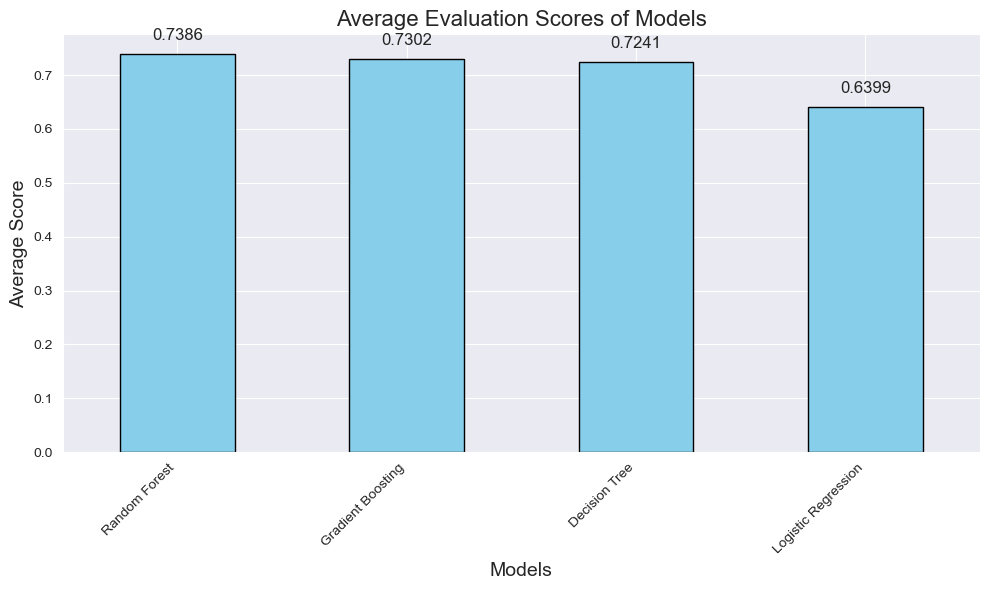

In [57]:
# Calculate the average score for each model
metrics_df['average_score'] = metrics_df.mean(axis=1)

# Sort the models based on the average score
sorted_models = metrics_df.sort_values(by='average_score', ascending=False)

plt.figure(figsize=(10, 6))
ax = sorted_models['average_score'].plot(kind='bar', color='skyblue', edgecolor='black')

# Set plot title and labels
plt.title('Average Evaluation Scores of Models', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Average Score', fontsize=14)

# Rotate x-axis labels if necessary
plt.xticks(rotation=45, ha='right')

# Annotate the bars with the average score values
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.4f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 8),
                textcoords='offset points',
                fontsize=12)

# Adjust layout to prevent clipping of tick-labels
plt.tight_layout()

# Show the plot
plt.show()


### Chose one of the algorithms and explain why

Based on the highest average evaluation score among all the models, we have selected the $Random Forest$ model as the best overall model for our classification task.